# Unidade 2 Trabalho 2 - Desempenho de algoritmos

## Objetivo Geral:  
Avaliar o desempenho de dois algoritmos fornecidos, considerando diversas entradas aleatórias e reproduzíveis, variando o tamanho do vetor de entrada até um valor N grande.

## Desenvolvimento

1. Instrumentar os código fornecidos com o módulo _time_ para medir o tempo de execução.
2. Realizar testes com vetores de tamanho variados.
3. Para cada tamanho de vetor, realizar múltiplas execuções e calcular o tempo médio e o intervalo de confiança.
4. Gerar gráficos que relacionam:
  a. Tamanho do vetor (eixo x);
  b. Tempo médio de execução (eixo y);
  c. Intervalos de confiança como barras de erro no gráfico.

### Classes

In [28]:
# from binarysearchtree import *
import plotly.graph_objs as go
# import pytest
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.stats import t
from binarysearchtree import BST

# Classe do Nó
class Node:
    """
    A class representing a node in a binary search tree.

    Attributes:
    - value: the value of the node
    - left_child: the left child of the node
    - right_child: the right child of the node
    """

    def __init__(self, value):
        """
        Initializes a new instance of the Node class.

        Args:
        - value: the value of the node
        """
        self.value = value
        self.left_child = None
        self.right_child = None

# Classe da Árvore
class BST:
    """
    A class representing a binary search tree.

    Attributes:
    - root: the root node of the tree
    """

    def __init__(self):
        """
        Initializes a new instance of the BST class.
        """
        self.root = None

    def add(self, value):
        """
        Adiciona um novo nó com o valor dado à árvore.

        Args:
        - value: o valor do nó que será adicionado.
        """
        if self.root is None:
            # Se a raiz ainda não existe, crie-a
            self.root = Node(value)
        else:
            # Encontre o lugar certo e insira um novo valor
            self._add_recursive(self.root, value)

    def _add_recursive(self, current_node, value):
        """
        A helper method to recursively traverse the tree and find the correct position to add the new node.

        Args:
        - current_node: the current node to traverse
        - value: the value of the node to add
        """
        if value <= current_node.value:
            # Go to the left
            if current_node.left_child is None:
                current_node.left_child = Node(value)
            else:
                self._add_recursive(current_node.left_child, value)
        else:
            # Go to the right
            if current_node.right_child is None:
                current_node.right_child = Node(value)
            else:
                self._add_recursive(current_node.right_child, value)

    def _contains(self, current_node, value):
        """
        Um método auxiliar para percorrer recursivamente a árvore e encontrar o nó com o valor fornecido.

        Args:
        - current_node: o nó atual a ser percorrido
        - value: o valor a ser procurado

        Returns:
        - Verdadeiro se um nó com o valor fornecido for encontrado, Falso caso contrário
        """
        if current_node is None:
            return False
        if current_node.value == value:
            return True
        if value < current_node.value:
            return self._contains(current_node.left_child, value)
        return self._contains(current_node.right_child, value)

    def contains(self, value):
        """
        Verifica se um nó com o valor fornecido está presente na árvore.

        Args:
        - value: o valor procurado.

        Returns:
        - Verdadeiro se um nó com o valor fornecido for encontrado, Falso caso contrário
        """
        return self._contains(self.root, value)

    def plot(self):
        """
        Plota a árvore de busca binária usando Plotly.
        """
        if self.root is None:
            print("The tree is empty!")
            return

        # Initialize lists for coordinates and connections
        node_coords = []
        lines = []

        # Função auxiliar para percorrer a árvore e preencher as listas de coordenadas e conexões
        def _plot_recursive(node, x, y, offset):
            if node is not None:
                node_coords.append((x, y, node.value))
                if node.left_child is not None:
                    new_x = x - offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.left_child, new_x, new_y, offset / 2)
                if node.right_child is not None:
                    new_x = x + offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.right_child, new_x, new_y, offset / 2)

        # Percorrer a árvore começando pelo nó raiz
        _plot_recursive(self.root, x=0, y=0, offset=0.5)

        # Crie um gráfico de dispersão para os nós
        node_trace = go.Scatter(x=[x for x, y, _ in node_coords],
                                y=[y for _, y, _ in node_coords],
                                text=[str(val) for _, _, val in node_coords],
                                mode='markers+text',
                                textposition='top center',
                                marker=dict(symbol='circle',
                                            size=20,
                                            color='darkblue'))

        # Crie um gráfico de dispersão para as conexões entre os nós
        line_trace = go.Scatter(x=sum([[x1, x2, None] for x1, y1, x2, y2 in lines], []),
                                y=sum([[y1, y2, None] for x1, y1, x2, y2 in lines], []),
                                mode='lines',
                                line=dict(color='black'))

        # Combine os dois gráficos de dispersão
        layout = go.Layout(title='',
                           xaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           yaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           showlegend=False)

        fig = go.Figure(data=[node_trace, line_trace], layout=layout)
        fig.show()

## Solver_closest

In [29]:
# %%file closestvalue.py

def findClosestValue(tree, target):
    """
    Finds the value in a binary search tree that is closest to the given target value.

    This function begins the search for the closest value from the root of the binary search tree.
    It works by recursively (or sequentialy) exploring the tree, narrowing down the search based on the target value
    and the current node's value. The closest value is constantly updated throughout the search process.

    Parameters:
    tree (BinarySearchTree): The binary search tree object in which to find the closest value.
                             It is expected to have a 'root' attribute that points to the root node of the tree.
    target (int or float): The target value for which the closest value in the binary search tree is sought.

    Returns:
    int or float: The value in the binary search tree that is closest to the target value.
    """
    return findClosestValueInBstHelper(tree.root, target, tree.root.value)

def findClosestValueInBstHelper(node, target, closest):
    if node is None:
        return closest
    if abs(target - closest) > abs(target - node.value):
        closest = node.value
    if target < node.value:
        return findClosestValueInBstHelper(node.left_child, target, closest)
    elif target > node.value:
        return findClosestValueInBstHelper(node.right_child, target, closest)
    else:
        return closest

## Solver_kth_largest

In [30]:
# %%file closestvalue.py

def findKthLargestValue(tree, k):
    """
    Finds the kth largest integer in a Binary Search Tree (BST).

    The function traverses the BST in an in-order manner to collect the node values in a sorted list.
    It then returns the kth largest value from this list. The BST is assumed to contain only integer values.
    In case of duplicate integers, they are treated as distinct values.
    The kth largest integer is determined in the context of these distinct values.

    Parameters:
    tree (BST): the Binary Search Tree (BST).
    k (int): A positive integer representing the kth position.

    Returns:
    int: The kth largest integer present in the BST.
    """

    sortedNodeValues = []
    inOrderTraverse(tree.root,sortedNodeValues)
    return sortedNodeValues[len(sortedNodeValues) - k]

def inOrderTraverse(node, sortedNodeValues):
    if node is None:
        return

    inOrderTraverse(node.left_child, sortedNodeValues)
    sortedNodeValues.append(node.value)
    inOrderTraverse(node.right_child, sortedNodeValues)

## Main

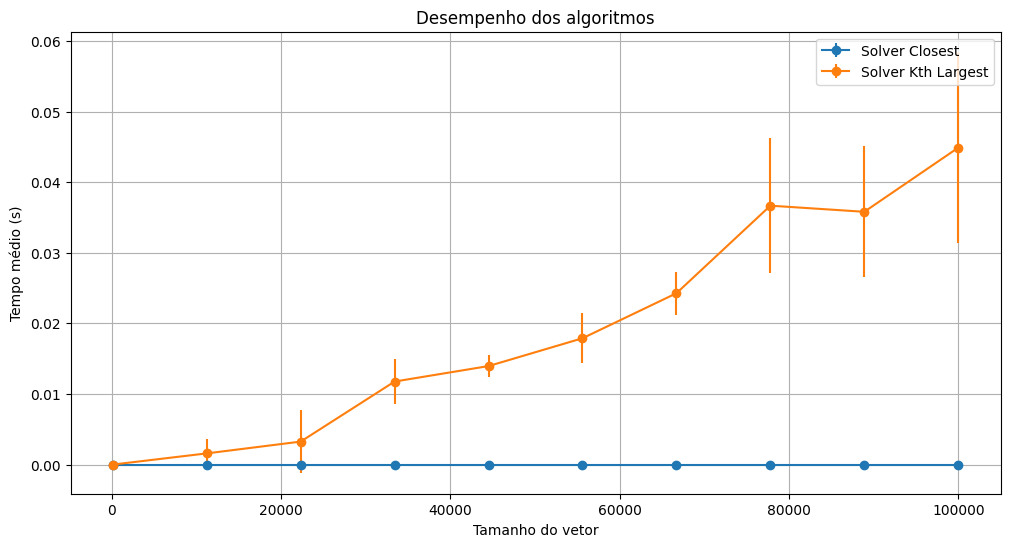

In [32]:
# Configurações
np.random.seed(42)
N = 100000  # Tamanho máximo do vetor
steps = 10  # Número de tamanhos de vetor a testar
executions_per_size = 5  # Número de execuções por tamanho de vetor

# Tamanhos dos vetores a testar
vector_sizes = np.linspace(100, N, steps, dtype=int)

# Preparação para coleta de dados
results_closest = []
results_kth_largest = []
confidence_intervals_closest = []
confidence_intervals_kth_largest = []

# Testar os algoritmos
for size in vector_sizes:
    times_closest = []
    times_kth_largest = []

    for _ in range(executions_per_size):
        data = np.random.randint(0, 1000, size)
        
        tree = BST()
        for value in data:
            tree.add(value)

        # Medir tempo para solver_closest
        start = time()
        findClosestValue(tree, target=50)
        times_closest.append(time() - start)

        # Medir tempo para solver_kth_largest
        start = time()
        findKthLargestValue(tree, k=10)
        times_kth_largest.append(time() - start)

    # Calcular médias e intervalos de confiança (95%)
    mean_closest = np.mean(times_closest)
    mean_kth_largest = np.mean(times_kth_largest)
    std_closest = np.std(times_closest, ddof=1)
    std_kth_largest = np.std(times_kth_largest, ddof=1)
    ci_closest = t.ppf(0.975, executions_per_size-1) * (std_closest / np.sqrt(executions_per_size))
    ci_kth_largest = t.ppf(0.975, executions_per_size-1) * (std_kth_largest / np.sqrt(executions_per_size))

    results_closest.append(mean_closest)
    results_kth_largest.append(mean_kth_largest)
    confidence_intervals_closest.append(ci_closest)
    confidence_intervals_kth_largest.append(ci_kth_largest)

# Gerar gráfico
plt.figure(figsize=(12, 6))
plt.errorbar(vector_sizes, results_closest, yerr=confidence_intervals_closest, label='Solver Closest', fmt='-o')
plt.errorbar(vector_sizes, results_kth_largest, yerr=confidence_intervals_kth_largest, label='Solver Kth Largest', fmt='-o')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo médio (s)')
plt.title('Desempenho dos algoritmos')
plt.legend()
plt.grid(True)
plt.show()